# Data prepare

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df=pd.read_csv("Data.csv")

In [69]:
df.head()

,Date,-21,-20,-19,-18,-17,-16,-15,-14,-13,...,-6,-5,-4,-3,-2,-1,0,LONG,NETUAL,SHORT
0,41806,-0.008503,0.014758,0.011849,0.000198,0.002646,0.001583,0.011297,0.018726,-0.002589,...,-0.002749,0.016001,0.005870,-0.004138,-0.016727,-0.010944,0.010079,1,0,0
1,41807,0.014141,0.011419,0.003924,-0.002749,0.016001,0.005870,-0.004138,-0.016727,-0.010944,...,0.016001,0.005870,-0.004138,-0.016727,-0.010944,0.010079,-0.001302,1,0,0
2,41808,0.011419,0.003924,-0.002749,0.016001,0.005870,-0.004138,-0.016727,-0.010944,0.010079,...,0.005870,-0.004138,-0.016727,-0.010944,0.010079,-0.001302,0.001086,0,1,0
3,41809,0.003924,-0.002749,0.016001,0.005870,-0.004138,-0.016727,-0.010944,0.010079,-0.001302,...,-0.004138,-0.016727,-0.010944,0.010079,-0.001302,0.001086,-0.003472,1,0,0
4,41810,-0.002749,0.016001,0.005870,-0.004138,-0.016727,-0.010944,0.010079,-0.001302,0.001086,...,-0.016727,-0.010944,0.010079,-0.001302,0.001086,-0.003472,-0.010342,1,0,0


In [70]:
df.drop("Date", axis=1,inplace=True)

In [71]:
X=df.iloc[:,:22]
y=df.iloc[:,-3:]
X.describe()
y.describe()

,LONG,NETUAL,SHORT
count,2426.000000,2426.000000,2426.00000
mean,0.426628,0.238252,0.33512
std,0.494689,0.426102,0.47213
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.00000
max,1.000000,1.000000,1.00000


In [72]:
X.describe()

,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
count,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,...,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000
mean,0.000545,0.000558,0.000555,0.000557,0.000564,0.000561,0.000559,0.000564,0.000561,0.000567,...,0.000564,0.000565,0.000565,0.000564,0.000561,0.000549,0.000543,0.000543,0.000547,0.000570
std,0.013340,0.013344,0.013342,0.013345,0.013348,0.013346,0.013349,0.013352,0.013342,0.013351,...,0.013351,0.013350,0.013347,0.013350,0.013349,0.013347,0.013348,0.013347,0.013350,0.013385
min,-0.099607,-0.099607,-0.099607,-0.099607,-0.099607,-0.099607,-0.099607,-0.099607,-0.099607,-0.099607,...,-0.099607,-0.099607,-0.099607,-0.099607,-0.099607,-0.099607,-0.099607,-0.099607,-0.099607,-0.099607
25%,-0.005821,-0.005759,-0.005759,-0.005759,-0.005759,-0.005759,-0.005821,-0.005821,-0.005759,-0.005759,...,-0.005759,-0.005759,-0.005753,-0.005753,-0.005753,-0.005759,-0.005821,-0.005821,-0.005821,-0.005821
50%,0.000673,0.000712,0.000712,0.000712,0.000758,0.000758,0.000752,0.000758,0.000758,0.000763,...,0.000758,0.000763,0.000763,0.000758,0.000752,0.000712,0.000676,0.000712,0.000752,0.000758
75%,0.007446,0.007470,0.007470,0.007470,0.007514,0.007514,0.007533,0.007533,0.007514,0.007533,...,0.007533,0.007533,0.007514,0.007533,0.007514,0.007470,0.007470,0.007470,0.007514,0.007533
max,0.070422,0.070422,0.070422,0.070422,0.070422,0.070422,0.070422,0.070422,0.070422,0.070422,...,0.070422,0.070422,0.070422,0.070422,0.070422,0.070422,0.070422,0.070422,0.070422,0.070422


# (Option 1) Deep learning

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,LSTM
from keras.optimizers import SGD

In [106]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [108]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=22))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [83]:
model.fit(X_train, y_train,
          epochs=18,
          batch_size=128)

Epoch 1/18
2183/2183 [==============================] - 1s 539us/step - loss: 1.0896 - acc: 0.3990
Epoch 2/18
2183/2183 [==============================] - 0s 24us/step - loss: 1.0735 - acc: 0.4288
Epoch 3/18
2183/2183 [==============================] - 0s 23us/step - loss: 1.0735 - acc: 0.4297
Epoch 4/18
2183/2183 [==============================] - 0s 22us/step - loss: 1.0711 - acc: 0.4292
Epoch 5/18
2183/2183 [==============================] - 0s 23us/step - loss: 1.0733 - acc: 0.4297
Epoch 6/18
2183/2183 [==============================] - 0s 22us/step - loss: 1.0729 - acc: 0.4279
Epoch 7/18
2183/2183 [==============================] - 0s 23us/step - loss: 1.0721 - acc: 0.4292
Epoch 8/18
2183/2183 [==============================] - 0s 23us/step - loss: 1.0724 - acc: 0.4292
Epoch 9/18
2183/2183 [==============================] - 0s 23us/step - loss: 1.0714 - acc: 0.4292
Epoch 10/18
2183/2183 [==============================] - 0s 24us/step - loss: 1.0711 - acc: 0.4292
Epoch 11/18
2183/2

In [118]:
score = model.evaluate(X_test, y_test, batch_size=128)

ValueError: Error when checking target: expected dense_54 to have shape (3,) but got array with shape (1,)

In [81]:
print(score)

[1.0794930585617881, 0.4032921788623794]


#  (Option 2) XGBoost

In [109]:
import xgboost as xgb

In [107]:
y_train_xgb=pd.DataFrame({"Classes":y_train["LONG"]*0+y_train["NETUAL"]*1+y_train["SHORT"]*2})
y_test_xgb=pd.DataFrame({"Classes":y_test["LONG"]*0+y_test["NETUAL"]*1+y_test["SHORT"]*2})

In [110]:
dtrain = xgb.DMatrix(data=X_train, label=y_train_xgb)
dtest = xgb.DMatrix(data=X_test)

In [111]:

params = {
    'max_depth': 6,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 3,
    'n_gpus': 0
}

In [112]:
bst = xgb.train(params, dtrain)

In [113]:
pred = bst.predict(dtest)

In [114]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.42      0.71      0.53       100
           1       0.33      0.09      0.14        56
           2       0.37      0.25      0.30        87

   micro avg       0.40      0.40      0.40       243
   macro avg       0.37      0.35      0.32       243
weighted avg       0.38      0.40      0.36       243



In [115]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[71,  5, 24],
       [37,  5, 14],
       [60,  5, 22]], dtype=int64)

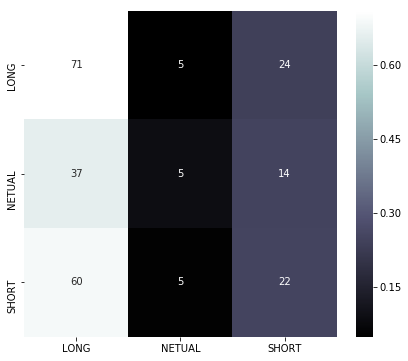

In [117]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')

plot_confusion_matrix(cm, ['LONG', 'NETUAL', 'SHORT'])
